Данный датасет скачан с сайта https://data.mos.ru/opendata/ из открытого источника

**Во вложении оставим датасет со скачанным JSON объектом. Сами же мы будет импортировать данные по API**

## Загружаем все необходимые библиотеки 

In [196]:
import requests
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

%matplotlib inline

In [197]:
plt.style.library.keys()

dict_keys(['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test_patch'])

## Выгрузка данных 

https://apidata.mos.ru/Docs

Мы зарегистрировались на портале, чтобы получить  API  ключ

In [198]:
datasetId= 61321
api_key = '57331609a2e872cf572e5ed03f1a02ce'

url = f'https://apidata.mos.ru/v1/datasets/{datasetId}/features'
url_structure = f'https://apidata.mos.ru/v1/datasets/{datasetId}'

params = {
    'api_key':api_key
}



##### Выгрузка структуры данных

In [199]:
response = requests.get(url_structure,params)
structure_json = response.json()

In [200]:
print('Название датасета:',structure_json['Caption'])
print('Версия датасета:',structure_json['VersionNumber'])
print('Дата выгрузки датасета датасета:',structure_json['VersionDate'])

Название датасета: Открытый реестр тренеров и специалистов (в том числе педагогов дополнительного образования по дополнительным общеразвивающим программам) в области физической культуры и спорта города Москвы
Версия датасета: 1.33
Дата выгрузки датасета датасета: 08.11.2021


In [201]:
df_structure = pd.DataFrame(structure_json['Columns'])
df_structure.head(10)

,Name,Caption,Visible,Type,SubColumns
0,LastName,Фамилия,True,STRING,None
1,Name,Имя,True,STRING,None
2,MiddleName,Отчество,True,STRING,None
3,Gender,Пол,True,DICTIONARY,None
4,DateOfBirth,Дата рождения,True,DATE,None
5,Photo,Фотография,False,FILE,None
6,Citizenship,Гражданство,False,CATALOG,"[{'Name': 'Citizenship', 'Caption': 'Гражданст..."
7,PublicPhone,Контактный телефон,False,CATALOG,"[{'Name': 'PublicPhone', 'Caption': 'Контактны..."
8,Email,Адрес электронной почты,False,CATALOG,"[{'Name': 'Email', 'Caption': 'Адрес электронн..."
9,AcademicDegree,"Ученая степень,звание",False,CATALOG,"[{'Name': 'AcademicDegreeName', 'Caption': 'На..."


In [202]:
df_structure['Type'].unique()

array(['STRING', 'DICTIONARY', 'DATE', 'FILE', 'CATALOG', 'INTEGER',
       'NUMBER'], dtype=object)

*Как можно заметить типы столбцов различны, но в данном случае нас интересуют три столбца ('DICTIONARY', 'FILE', 'CATALOG')*

In [203]:
df_structure[df_structure['Type'].isin(['DICTIONARY', 'FILE', 'CATALOG'])]

,Name,Caption,Visible,Type,SubColumns
3,Gender,Пол,True,DICTIONARY,None
5,Photo,Фотография,False,FILE,None
6,Citizenship,Гражданство,False,CATALOG,"[{'Name': 'Citizenship', 'Caption': 'Гражданст..."
7,PublicPhone,Контактный телефон,False,CATALOG,"[{'Name': 'PublicPhone', 'Caption': 'Контактны..."
8,Email,Адрес электронной почты,False,CATALOG,"[{'Name': 'Email', 'Caption': 'Адрес электронн..."
9,AcademicDegree,"Ученая степень,звание",False,CATALOG,"[{'Name': 'AcademicDegreeName', 'Caption': 'На..."
11,Sport,Вид спорта тренера,False,CATALOG,"[{'Name': 'SportName', 'Caption': 'Наименовани..."
12,Education,Профильное образование повиду спорта,False,CATALOG,"[{'Name': 'EducationLevel', 'Caption': 'Уровен..."
13,AdditionalEducation,Дополнительное образование по виду спорта,False,CATALOG,"[{'Name': 'AdditionalEducationLevel', 'Caption..."
14,Attestation,Аттестация по виду спорта,False,CATALOG,"[{'Name': 'AvailabilityOfCertification', 'Capt..."


*Выделим из данного датасета субколонки в отдельные строки*

In [204]:
df_subcolumns = df_structure[df_structure['Type']=='CATALOG'].reset_index(drop=True)

In [205]:
for i in range(df_subcolumns.shape[0]):
    df_structure = df_structure.append(df_subcolumns['SubColumns'].iloc[i])

In [206]:
df_structure = df_structure[df_structure['Type']!='CATALOG']
df_structure.reset_index(drop=True,inplace=True)
df_structure.head()

,Name,Caption,Visible,Type,SubColumns
0,LastName,Фамилия,True,STRING,None
1,Name,Имя,True,STRING,None
2,MiddleName,Отчество,True,STRING,None
3,Gender,Пол,True,DICTIONARY,None
4,DateOfBirth,Дата рождения,True,DATE,None


In [207]:
df_structure['Caption'].nunique()

53

##### Выгрузка основных данных для анализа

In [208]:
response = requests.get('https://apidata.mos.ru/v1/datasets/61321/rows',params)
data_json = response.json()

In [209]:
def modern_dict(json_cells_data):
    mod_dict = json_cells_data.copy()
    for key, value in json_cells_data.items():
        if isinstance(value,list) and value:
            mod_dict.pop(key)
            mod_dict = {**mod_dict, **value[0]}
    return mod_dict

In [210]:
for i in range(len(data_json)):
    data_json[i]=modern_dict(data_json[i]['Cells'])

In [211]:
columns_all = df_structure['Name'].unique()
len(data_json[30])

39

In [212]:
df_data = pd.DataFrame(columns = columns_all)

In [213]:
df_data

,LastName,Name,MiddleName,Gender,DateOfBirth,Photo,OtherAchievements,SportSpecialization,SportActivityGender,SportActivityMinAge,...,CoachCategoryStartDate,CoachCategoryEndDate,ServiceName,ServiceObject,ServiceText,RankName,RankBeginDate,RankEndDate,FederationMembershipOrganisation,FederationMembershipDate


In [214]:
for i in range(len(data_json)):
    df_data.loc[i]=['']*len(columns_all)
    for key,value in data_json[i].items():
        if key not in columns_all:
            #print(key,value)
            continue
        df_data.loc[i,key]=value

Мы обнаружили при помощи print, что ключи, которые мы удаляли присутствуют в Json данных. Связано это с тем, что мы не удаляли
ключ, если его значение равно пустому словарю. Так что при загрузке в датасет мы исключим "общие колонки"

## Общий анализ датасета

In [215]:
df_data = df_data.replace('',np.nan).replace('None',np.nan)
df_data.head()

,LastName,Name,MiddleName,Gender,DateOfBirth,Photo,OtherAchievements,SportSpecialization,SportActivityGender,SportActivityMinAge,...,CoachCategoryStartDate,CoachCategoryEndDate,ServiceName,ServiceObject,ServiceText,RankName,RankBeginDate,RankEndDate,FederationMembershipOrganisation,FederationMembershipDate
0,Абызова,Надежда,Викторовна,женский,19.01.1973,None,NaN,Большой спорт,Любой,6,...,06.05.2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Алешина,Лариса,Владимировна,женский,01.02.1960,None,NaN,Большой спорт,Любой,6,...,01.04.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Андрюхин,Алексей,Михайлович,мужской,21.11.1973,None,NaN,Спортивный резерв,Любой,6,...,01.12.2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ануров,Александр,Львович,мужской,10.11.1957,None,NaN,Большой спорт,Любой,6,...,06.05.2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Анурова,Екатерина,Александровна,женский,21.03.1993,None,NaN,Большой спорт,Любой,6,...,01.04.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4288 entries, 0 to 4287
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   LastName                          4288 non-null   object 
 1   Name                              4288 non-null   object 
 2   MiddleName                        4274 non-null   object 
 3   Gender                            4288 non-null   object 
 4   DateOfBirth                       4288 non-null   object 
 5   Photo                             0 non-null      object 
 6   OtherAchievements                 0 non-null      float64
 7   SportSpecialization               4288 non-null   object 
 8   SportActivityGender               4288 non-null   object 
 9   SportActivityMinAge               4288 non-null   int64  
 10  SportActivityMaxAge               0 non-null      object 
 11  PersonalAchievement               0 non-null      float64
 12  PupilA

 Как видно большинство столбцов пустые и видимо данные будут в них подгружаться позднее

Удалим полностью пустые столбцы

In [217]:
df_data.dropna(how='all', axis=1,inplace=True)
date_col = ['DateOfBirth','JobOrganizationStartDate','CoachCategoryStartDate']
for col in date_col:
    df_data[col] = pd.to_datetime(df_data[col],format = '%d.%m.%Y')

df_data[['SportActivityMinAge','SeniorityPeriod']] = df_data[['SportActivityMinAge','SeniorityPeriod']].astype(int)
df_data.head()

,LastName,Name,MiddleName,Gender,DateOfBirth,SportSpecialization,SportActivityGender,SportActivityMinAge,global_id,Citizenship,PublicPhone,Email,SportName,SeniorityPeriod,AvailabilityOfCertification,JobOrganizationName,JobOrganizationStartDate,CoachCategoryName,CoachCategoryStartDate
0,Абызова,Надежда,Викторовна,женский,1973-01-19,Большой спорт,Любой,6,901080390,Россия,(499) 242-41-61,s29@mossport.ru,акробатический рок-н-ролл,27,нет,ГБУ «СШ № 29 «Хамовники» Москомспорта,1994-06-01,Старший тренер,2014-05-06
1,Алешина,Лариса,Владимировна,женский,1960-02-01,Большой спорт,Любой,6,901079981,Россия,(499) 242-41-61,s29@mossport.ru,акробатический рок-н-ролл,12,нет,ГБУ «СШ № 29 «Хамовники» Москомспорта,2017-01-17,Старший тренер,2016-04-01
2,Андрюхин,Алексей,Михайлович,мужской,1973-11-21,Спортивный резерв,Любой,6,901080042,Россия,(499) 242-41-61,s29@mossport.ru,акробатический рок-н-ролл,16,нет,ГБУ «СШ № 29 «Хамовники» Москомспорта,2007-09-03,Старший тренер,2010-12-01
3,Ануров,Александр,Львович,мужской,1957-11-10,Большой спорт,Любой,6,901080391,Россия,(499) 242-41-61,s29@mossport.ru,акробатический рок-н-ролл,39,нет,ГБУ «СШ № 29 «Хамовники» Москомспорта,2004-09-01,Старший тренер,2009-05-06
4,Анурова,Екатерина,Александровна,женский,1993-03-21,Большой спорт,Любой,6,901080392,Россия,(499) 242-41-61,s29@mossport.ru,акробатический рок-н-ролл,6,нет,ГБУ «СШ № 29 «Хамовники» Москомспорта,2013-11-01,Старший тренер,2016-04-01


In [218]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4288 entries, 0 to 4287
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LastName                     4288 non-null   object        
 1   Name                         4288 non-null   object        
 2   MiddleName                   4274 non-null   object        
 3   Gender                       4288 non-null   object        
 4   DateOfBirth                  4288 non-null   datetime64[ns]
 5   SportSpecialization          4288 non-null   object        
 6   SportActivityGender          4288 non-null   object        
 7   SportActivityMinAge          4288 non-null   int32         
 8   global_id                    4288 non-null   int64         
 9   Citizenship                  4288 non-null   object        
 10  PublicPhone                  4261 non-null   object        
 11  Email                        4182 non-null 

In [219]:
df_data['SeniorityPeriod'].describe()

count    4288.000000
mean       18.233209
std        12.416634
min         1.000000
25%         8.000000
50%        15.000000
75%        27.000000
max        62.000000
Name: SeniorityPeriod, dtype: float64

### Первичный анализ данных

Рассмотрим гендерные различия в данной профессии

Text(0.5, 1.0, 'Распределение по полу среди тренеров МСК')

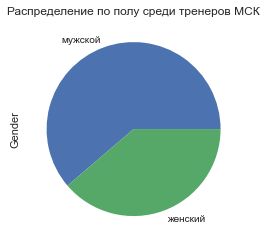

In [220]:
df_data['Gender'].value_counts().plot(kind = 'pie')

plt.title('Распределение по полу среди тренеров МСК')

In [221]:
df_data['Year'] = df_data['DateOfBirth'].apply(lambda x:x.year)

<AxesSubplot:xlabel='Gender', ylabel='Year'>

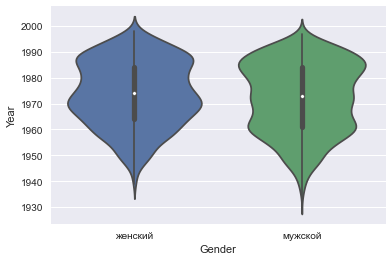

In [222]:
sns.violinplot(x='Gender', y='Year', data=df_data)


Из данных графиков мы видим, что количество тренеров мужчин превышает женщин

In [223]:
df_data[['Gender','Year']].pivot_table(values = 'Year',index='Gender',aggfunc=['mean','std','max','min','median']).T

,Gender,женский,мужской
mean,Year,1973.650813,1972.086030
std,Year,12.588613,13.562057
max,Year,1998.000000,1997.000000
min,Year,1939.000000,1933.000000
median,Year,1974.000000,1973.000000


По возрасту отличий почти нету. Между полом и возрастом закономерностей нету

In [224]:
df_data['SportSpecialization'].unique()

array(['Большой спорт', 'Спортивный резерв', 'Общефизическая подготовка',
       'Любительский спорт'], dtype=object)

In [225]:
df_data.pivot_table(index ='SportSpecialization', columns='Gender' ,values = 'Year',aggfunc=['count'])


count        
Gender                    женский мужской
SportSpecialization                      
Большой спорт               502.0   924.0
Любительский спорт            NaN     5.0
Общефизическая подготовка   437.0   465.0
Спортивный резерв           722.0  1233.0

In [226]:
df_data['SportName'].unique()[:10]

array(['акробатический рок-н-ролл', 'спортивная аэробика',
       'эстетическая гимнастика', 'прыжки на батуте',
       'спортивная акробатика', 'дзюдо', 'самбо',
       'спорт лиц с поражением ода', 'конный спорт',
       'фигурное катание на коньках'], dtype=object)

In [227]:
df_data_SportName = df_data.pivot_table(index ='SportName', columns='Gender' ,values = 'Year',aggfunc=['count']).fillna(0)

In [228]:
df_data_SportName.columns = ['женский','мужской']

In [229]:
df_data_SportName[df_data_SportName['женский']==0].index

Index(['американский футбол', 'армейский рукопашный бой', 'бодибилдинг',
       'воркаут', 'восточное боевое единоборство', 'всестилевое каратэ',
       'капоэйра', 'катание на коньках', 'подводный спорт', 'полиатлон',
       'прыжки на лыжах с трамплина', 'пэйнтбол', 'рукопашный бой',
       'смешанное боевое единоборство (мма)',
       'спорт лиц с общими заболеваниями', 'спортивный туризм',
       'стендовая стрельба', 'тайский бокс',
       'физическая культура для лиц с нарушением интеллекта',
       'хоккей с мячом'],
      dtype='object', name='SportName')

In [230]:
df_data_SportName[df_data_SportName['мужской']==0].index

Index(['аквааэробика', 'боулинг', 'веломобильный спорт', 'велоспорт-вмх',
       'велоспорт-маунтинбайк', 'велоспорт-трек', 'зумба', 'йога',
       'настольные игры', 'оздоровительная гимнастика', 'софтбол',
       'фитнес-аэробика', 'чанбара', 'черлидинг', 'чир спорт',
       'эстетическая гимнастика'],
      dtype='object', name='SportName')

In [231]:
df_data_SportName[(df_data_SportName['мужской']!=0)&(df_data_SportName['женский']!=0)].index

Index(['айкидо', 'акробатический рок-н-ролл', 'бадминтон', 'баскетбол',
       'бейсбол', 'биатлон', 'бильярдный спорт', 'бобслей', 'бокс',
       'борьба на поясах', 'бочча', 'водное поло', 'воднолыжный спорт',
       'волейбол', 'всероссийский физкультурно-спортивный комплекс "гто"',
       'гандбол', 'гольф', 'горнолыжный спорт', 'городошный спорт',
       'гребля на байдарках и каноэ', 'гребной слалом', 'гребной спорт',
       'дартс', 'джиу-джитсу', 'дзюдо', 'каратэ', 'кикбоксинг', 'киокусинкай',
       'конный спорт', 'конькобежный спорт', 'легкая атлетика',
       'лыжное двоеборье', 'лыжные гонки', 'настольный теннис',
       'общая физическая подготовка', 'парусный спорт', 'пауэрлифтинг',
       'плавание', 'прыжки в воду', 'прыжки на батуте', 'пулевая стрельба',
       'регби', 'самбо', 'санный спорт', 'синхронное плавание', 'скалолазание',
       'скандинавская ходьба', 'сноуборд', 'современное пятиборье',
       'спорт глухих', 'спорт лиц с интеллектуальными нарушениями',
 

In [232]:
print("Количество видов спорта где тренер только женщина - {0}".format(len(df_data_SportName[df_data_SportName['женский']==0].index)))
print("Количество видов спорта где тренер только мужчина - {0}".format(len(df_data_SportName[df_data_SportName['мужской']==0].index)))
print("Общее количество видов спорта - {0}".format(len(df_data_SportName.index)))

Количество видов спорта где тренер только женщина - 20
Количество видов спорта где тренер только мужчина - 16
Общее количество видов спорта - 113


In [233]:
df_data['Citizenship'].value_counts()

Россия     4287
Украина       1
Name: Citizenship, dtype: int64

In [234]:
df_data[df_data['Citizenship']=='Украина'].T

,341
LastName,Пахомов
Name,Денис
MiddleName,Андреевич
Gender,мужской
DateOfBirth,1994-08-17 00:00:00
SportSpecialization,Общефизическая подготовка
SportActivityGender,Любой
SportActivityMinAge,6
global_id,901080957
Citizenship,Украина


Попробуем узнать что то о данном тренере

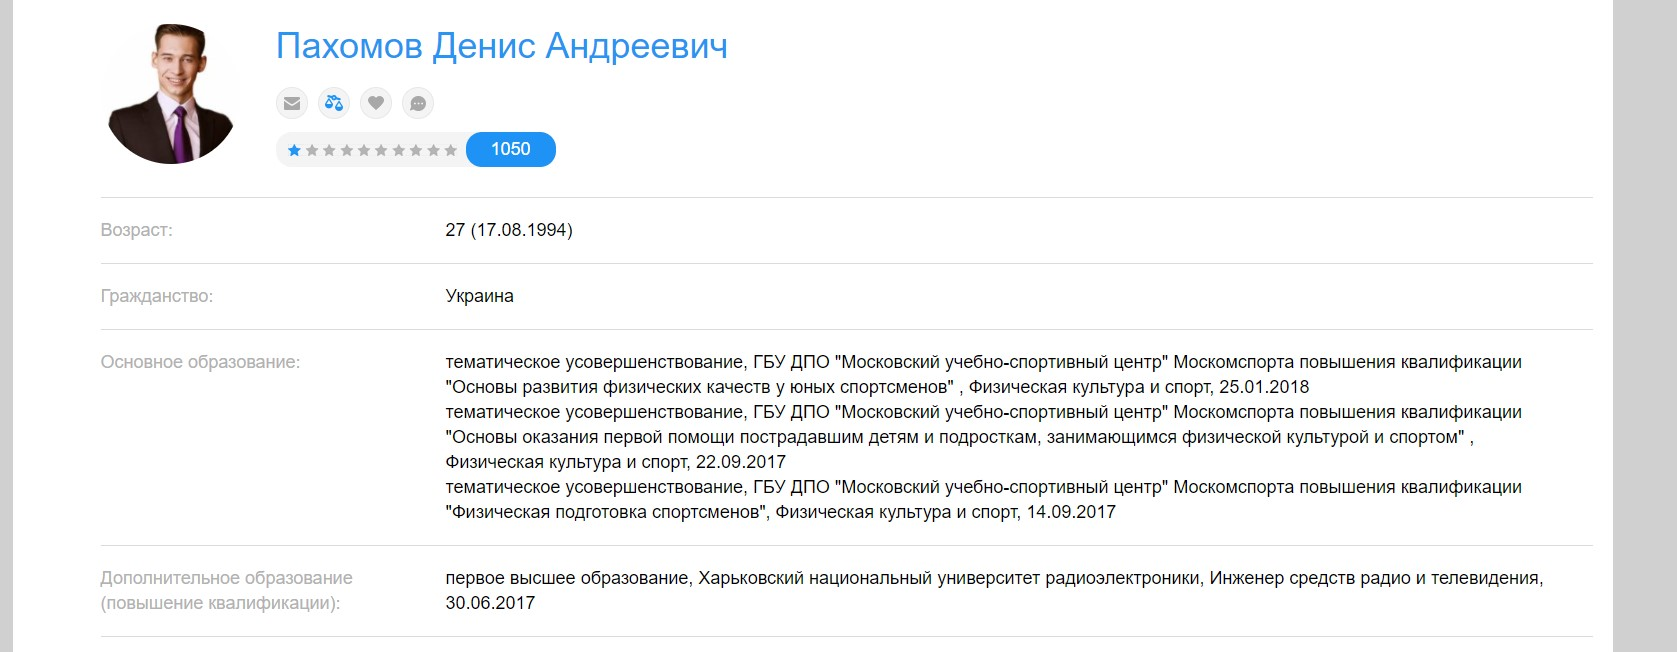

In [235]:
from IPython.display import Image
Image(filename = "Тренер_украины.jpg", width=1000, height=200)

Как мы видим данных в открытом доступе значительно больше и при необходимости их можно "собрать", однако на данном этапе нам это не требуется